In [1]:
import os
import sys

import json
import csv

In [2]:

import numpy as np


import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd

In [3]:
%matplotlib inline

In [4]:
ROOT = 'logs_from_tensorflow'

In [7]:
tmp_reward_csv = 'findview_{dataset}_{method}_{run_id}_{identifier}_reward.csv'

reward_columns = ['time', 'Steps', 'Rewards']
reward_csvs = {
    '0': os.path.join(
        ROOT,
        tmp_reward_csv.format(
            dataset='sun360_alpha_indoor',
            method='inverse',
            run_id='run_2',
            identifier='doublelength',
        ),
    ),
    '1': os.path.join(
        ROOT,
        tmp_reward_csv.format(
            dataset='sun360_alpha_indoor',
            method='inverse',
            run_id='run_2',
            identifier='doublelengths2',
        ),
    ),
    '2': os.path.join(
        ROOT,
        tmp_reward_csv.format(
            dataset='sun360_alpha_indoor',
            method='inverse',
            run_id='run_2',
            identifier='doublelength3',
        ),
    ),
}

In [8]:
dfs = []
for name, csv_path in reward_csvs.items():
    df = pd.read_csv(
        csv_path,
        sep=',',
        header=0,
    )
    df.columns = reward_columns
    df['Seed'] = pd.Series([name for _ in range(len(df.index))])
    dfs.append(df)

rewards = pd.concat(dfs).reset_index(drop=True)

In [9]:
# plt.rcParams['font.family'] = 'Times New Roman'

In [10]:
sns.set(style="darkgrid", font_scale=0.9, font="Arial")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


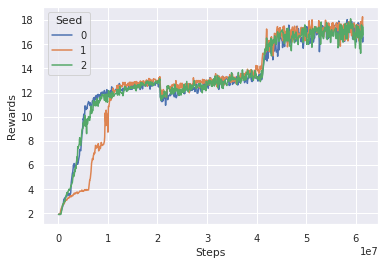

In [12]:
sns.lineplot(data=rewards, x="Steps", y="Rewards", hue="Seed")
plt.savefig('rewards.eps', format='eps', dpi=1000)